#Q1 - Train Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data_path = 'train.csv'  # Replace with the correct path if necessary
train_data = pd.read_csv(train_data_path)

# Preprocess the data
# Drop columns that are not useful for the model (e.g., Name, Ticket, PassengerId, Cabin)
train_data_cleaned = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values: Fill missing 'Age' with the mean and 'Embarked' with the mode
train_data_cleaned['Age'] = train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].mean())
train_data_cleaned['Embarked'] = train_data_cleaned['Embarked'].fillna(train_data_cleaned['Embarked'].mode()[0])


# Encoding categorical variables 'Sex' and 'Embarked'
label_encoder_sex = LabelEncoder()
train_data_cleaned['Sex'] = label_encoder_sex.fit_transform(train_data_cleaned['Sex'])

label_encoder_embarked = LabelEncoder()
train_data_cleaned['Embarked'] = label_encoder_embarked.fit_transform(train_data_cleaned['Embarked'])

# Split the data into features (X) and target (y)
X = train_data_cleaned.drop(columns=['Survived'])
y = train_data_cleaned['Survived']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 81.01%
Confusion Matrix:
[[91 14]
 [20 54]]


#Q2 - Iris Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train with default n_estimators=10
rf_model_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_default.fit(X_train, y_train)

# Evaluate the accuracy score with default n_estimators
y_pred_default = rf_model_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default n_estimators=10: {accuracy_default * 100:.2f}%")

# 2. Fine-tuning the model by changing n_estimators
best_accuracy = 0
best_n_estimators = 10

for n_estimators in [10, 50, 100, 200, 500]:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy achieved with n_estimators={best_n_estimators}: {best_accuracy * 100:.2f}%")

Accuracy with default n_estimators=10: 100.00%
Best accuracy achieved with n_estimators=10: 100.00%


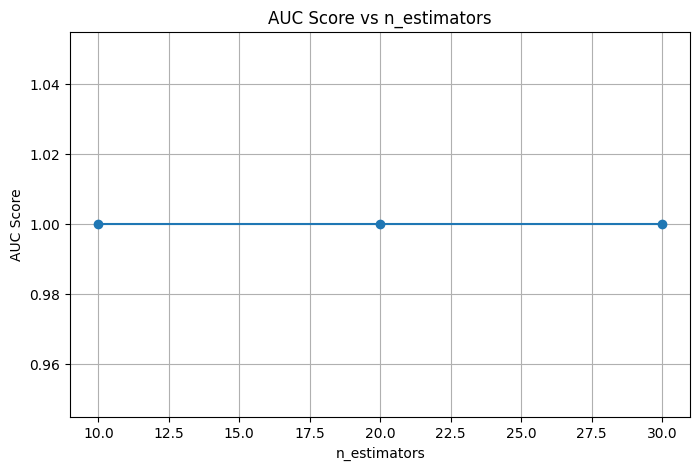

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output for AUC (multiclass)
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Track AUC scores
n_estimators_list = [10, 20, 30]
auc_scores = []

# Train and compute AUC for each n_estimators value
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_prob = rf.predict_proba(X_test)

    # For multiclass AUC, concatenate predictions from all classifiers
    y_prob_combined = [prob[:, 1] for prob in y_prob]
    y_prob_stack = list(map(list, zip(*y_prob_combined)))

    # Compute macro AUC
    auc = roc_auc_score(y_test, y_prob_stack, average='macro', multi_class='ovr')
    auc_scores.append(auc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, auc_scores, marker='o', linestyle='-')
plt.title("AUC Score vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC Score")
plt.grid(True)
plt.show()


#Q1 - Income.csv Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('income.csv')

# Define features and target variable
X = data.drop(columns=['income_level'])
y = data['income_level']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build AdaBoost model (default base estimator is a DecisionTreeClassifier with max_depth=1)
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 83.27%
Confusion Matrix:
[[7003  411]
 [1223 1132]]


#Q2 - Iris Dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define n_estimators values and learning rates for fine-tuning
n_estimators_values = [50, 100, 150]
learning_rates = [0.1, 0.5, 1.0]

# Results with DecisionTreeClassifier as base estimator
print("Results with DecisionTreeClassifier as base estimator:")
for n_estimators in n_estimators_values:
    for learning_rate in learning_rates:
        ada_boost_dt = AdaBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=42
        )
        ada_boost_dt.fit(X_train, y_train)
        y_pred = ada_boost_dt.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"n_estimators={n_estimators}, learning_rate={learning_rate} -> Accuracy: {accuracy * 100:.2f}%")

# Results with LogisticRegression as base estimator
# Using Logistic Regression as a weak learner in AdaBoost is not directly supported, so we will skip this
print("\nLogistic Regression cannot be used as a base estimator directly in AdaBoost.")


Results with DecisionTreeClassifier as base estimator:
n_estimators=50, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=50, learning_rate=0.5 -> Accuracy: 96.67%
n_estimators=50, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=100, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=100, learning_rate=0.5 -> Accuracy: 100.00%
n_estimators=100, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=150, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=150, learning_rate=0.5 -> Accuracy: 96.67%
n_estimators=150, learning_rate=1.0 -> Accuracy: 93.33%

Logistic Regression cannot be used as a base estimator directly in AdaBoost.


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter values
n_estimators_values = [50, 100, 150]
learning_rates = [0.1, 0.5, 1.0]

# Using DecisionTreeClassifier
print("Results with DecisionTreeClassifier as base estimator:")
for n in n_estimators_values:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"n_estimators={n}, learning_rate={lr} -> Accuracy: {acc * 100:.2f}%")

# Using LogisticRegression
print("\nResults with LogisticRegression as base estimator:")
for n in n_estimators_values:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=LogisticRegression(max_iter=1000, random_state=42),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"n_estimators={n}, learning_rate={lr} -> Accuracy: {acc * 100:.2f}%")


Results with DecisionTreeClassifier as base estimator:
n_estimators=50, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=50, learning_rate=0.5 -> Accuracy: 96.67%
n_estimators=50, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=100, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=100, learning_rate=0.5 -> Accuracy: 100.00%
n_estimators=100, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=150, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=150, learning_rate=0.5 -> Accuracy: 96.67%
n_estimators=150, learning_rate=1.0 -> Accuracy: 93.33%

Results with LogisticRegression as base estimator:
n_estimators=50, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=50, learning_rate=0.5 -> Accuracy: 100.00%
n_estimators=50, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=100, learning_rate=0.1 -> Accuracy: 100.00%
n_estimators=100, learning_rate=0.5 -> Accuracy: 100.00%
n_estimators=100, learning_rate=1.0 -> Accuracy: 93.33%
n_estimators=150, learning_rate=0.1 -> Accuracy: 10

Q3

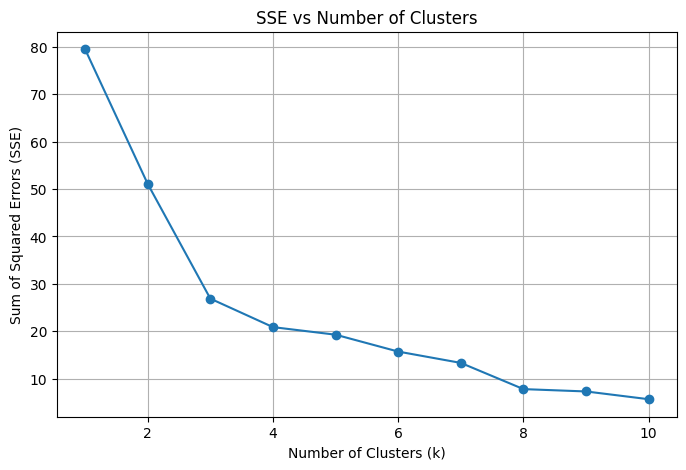

Cluster labels for test data: [2 1 1 1 2 0 2 2 1 0]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

# Step 1: Create synthetic income dataset
np.random.seed(42)
names = [f'Person_{i}' for i in range(1, 51)]
ages = np.random.randint(20, 60, size=50)
incomes = np.random.randint(20000, 120000, size=50)

income_df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Income': incomes
})

# Save to CSV (optional)
income_df.to_csv("income.csv", index=False)

# Step 2: Load and preprocess
df = pd.read_csv("income.csv")

# Drop name (non-numeric)
df_numeric = df.drop('Name', axis=1)

# Step 3: Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 4: Train-test split
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Step 5: SSE vs number of clusters (Elbow method)
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    sse.append(km.inertia_)

# Step 6: Plot SSE
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Step 7: Fit KMeans with optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Step 8: Predict clusters on test set
y_pred = kmeans.predict(X_test)

# Step 9: "Accuracy" – not meaningful in unsupervised, but just a check
print("Cluster labels for test data:", y_pred)


Q4

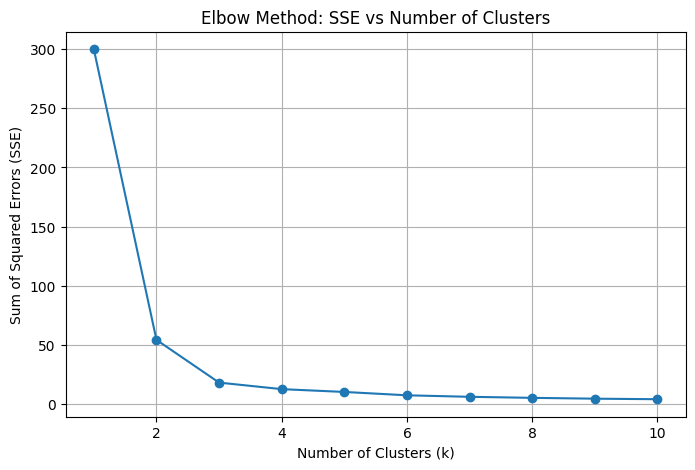

'\noptimal_k = 3\nkmeans = KMeans(n_clusters=optimal_k, random_state=42)\nlabels = kmeans.fit_predict(iris_scaled)\n\nplt.figure(figsize=(8, 5))\nplt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels, cmap=\'viridis\', s=50)\nplt.title("KMeans Clustering (k=3) on Iris Petal Features")\nplt.xlabel("Scaled Petal Length")\nplt.ylabel("Scaled Petal Width")\nplt.grid(True)\nplt.show()\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load iris dataset and use only petal length & width
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df = iris_df[['petal length (cm)', 'petal width (cm)']]  # drop other features

# Step 2: Scaling
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Step 3: Elbow method to find optimal k
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(iris_scaled)
    sse.append(km.inertia_)

# Step 4: Plot SSE vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

# Optional: Fit with optimal k = 3 and visualize clusters'
'''
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(iris_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering (k=3) on Iris Petal Features")
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.grid(True)
plt.show()
'''

Q5

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression without PCA
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(f"Accuracy without PCA: {accuracy_score(y_test, preds):.4f}")

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression with PCA-reduced data
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train_pca)
preds_pca = lr_pca.predict(X_test_pca)
print(f"Accuracy with PCA (2 components): {accuracy_score(y_test_pca, preds_pca):.4f}")


Accuracy without PCA: 0.9722
Accuracy with PCA (2 components): 0.5389


Q6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Load dataset
heart_df = pd.read_csv("heart.csv")

# Print column names to verify
print("Column names in dataset:", heart_df.columns.tolist())

# Optional: rename columns if necessary (based on your dataset)
# Example only – skip this if your columns are already clean
heart_df.columns = [col.strip().lower() for col in heart_df.columns]

# Reprint cleaned column names
print("Cleaned column names:", heart_df.columns.tolist())

# Remove outliers using Z-score
z_scores = np.abs(zscore(heart_df.select_dtypes(include=[np.number])))
heart_df = heart_df[(z_scores < 3).all(axis=1)]

# Determine categorical columns that need encoding
categorical_cols = heart_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Encode categorical columns using one-hot encoding
if categorical_cols:
    heart_df = pd.get_dummies(heart_df, columns=categorical_cols, drop_first=True)

# Split features and target
target_col = 'target' if 'target' in heart_df.columns else heart_df.columns[-1]
X = heart_df.drop(target_col, axis=1)
y = heart_df[target_col]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

print("\nModel Accuracy WITHOUT PCA:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("\nModel Accuracy WITH PCA:")
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    preds = model.predict(X_test_pca)
    print(f"{name}: {accuracy_score(y_test_pca, preds):.4f}")


Column names in dataset: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
Cleaned column names: ['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs', 'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope', 'heartdisease']

Model Accuracy WITHOUT PCA:
Logistic Regression: 0.9444
SVM: 0.9333
Random Forest: 0.9222

Model Accuracy WITH PCA:
Logistic Regression: 0.8611
SVM: 0.8778
Random Forest: 0.8889
